# H1B data exploration

Michael Li

Dec 03, 2017

Data source: https://www.kaggle.com/nsharan/h-1b-visa/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('h1b_kaggle.csv', index_col = 0, dtype = {'YEAR': str})
df.head()

/Users/Michael/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [39]:
df['CASE_STATUS'].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [40]:
df['YEAR'].value_counts()

2016    647803
2015    618727
2014    519427
2013    442114
2012    415607
2011    358767
Name: YEAR, dtype: int64

In [14]:
df.shape

(3002458, 10)

In [19]:
df[df['CASE_STATUS'] == 'DENIED']['PREVAILING_WAGE'].describe()

count    9.429300e+04
mean     2.245191e+06
std      2.912081e+07
min      0.000000e+00
25%      4.596800e+04
50%      5.977900e+04
75%      7.860300e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

In [20]:
df['PREVAILING_WAGE'].describe()

count    3.002373e+06
mean     1.469984e+05
std      5.287609e+06
min      0.000000e+00
25%      5.437100e+04
50%      6.502100e+04
75%      8.143200e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

Clearly there are outliers in the prevailing wage column.

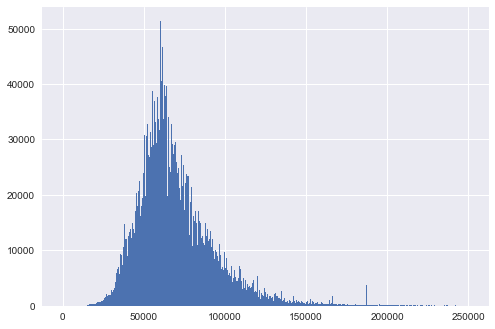

In [51]:
plt.clf()
df[df['PREVAILING_WAGE']<= 250000]['PREVAILING_WAGE'].hist(bins = 500)
plt.show()

Records with wage above 250,000 are presumed outliers. They will be dropped from the dataframe.

In [52]:
df_cleaned = df[df['PREVAILING_WAGE']<=250000]

In [56]:
df_cleaned['SOC_NAME'] = df_cleaned['SOC_NAME'].apply(lambda x: str(x).upper())
df_cleaned['EMPLOYER_NAME'] = df_cleaned['EMPLOYER_NAME'].apply(lambda x: str(x).upper())
df_cleaned['JOB_TITLE'] = df_cleaned['JOB_TITLE'].apply(lambda x: str(x).upper())

/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

There are duplicated strings resulted by upper and lower case differences. Converting them all to upper case is convenient for processing and spotting trends.

In [58]:
df_cleaned.to_csv('h1b.csv', index=False)